In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib as mpl
import datetime
import logging
from logging import handlers
from fetch_data import (
    static_population_erva_age,
)
from forward_integration import forward_integration, get_model_parameters
from estimating_beta import construct_next_generation_matrix
from plot_utils import plot_ervas, plot_age_groups
from env_var import EPIDEMIC, MAPPINGS
mpl.rcParams['figure.dpi']= 175
plt.style.use('ggplot')

In [2]:
erva_pop_file = 'stats/erva_population_age_2020.csv'
number_age_groups = 9
num_ervas = 5
N_p = num_ervas
N_g = number_age_groups
mob_av, beta_gh, pop_erva_hat, age_er, = get_model_parameters(number_age_groups, num_ervas, erva_pop_file)
rho = construct_next_generation_matrix(beta_gh, pop_erva_hat, mob_av, age_er)

# number of optimization variables
N_f = (N_g-3)*N_p

In [3]:
# Plot parameters
plot_interval = 15
ervas_labels = EPIDEMIC['ervas_order']
age_labels = MAPPINGS['age_groups'][number_age_groups]['names']

# Simulation parameters
t0 = '2021-04-19'
T = 115

# Transmission parameter
R = 2.0t
beta = R/rho
print(beta)

# Number of vaccines per day
u = 30000

0.04088294530429278


In [4]:
policy = 'equal'

_, _, _, _, _, D_g, u_g = forward_integration(u, mob_av, beta, beta_gh, T, pop_erva_hat, age_er, t0, policy)

age_er_prop = age_er.T
age_er_prop = age_er_prop[:, :, np.newaxis]
D_g_plot = D_g*age_er_prop
u_g_plot = u_g*age_er_prop

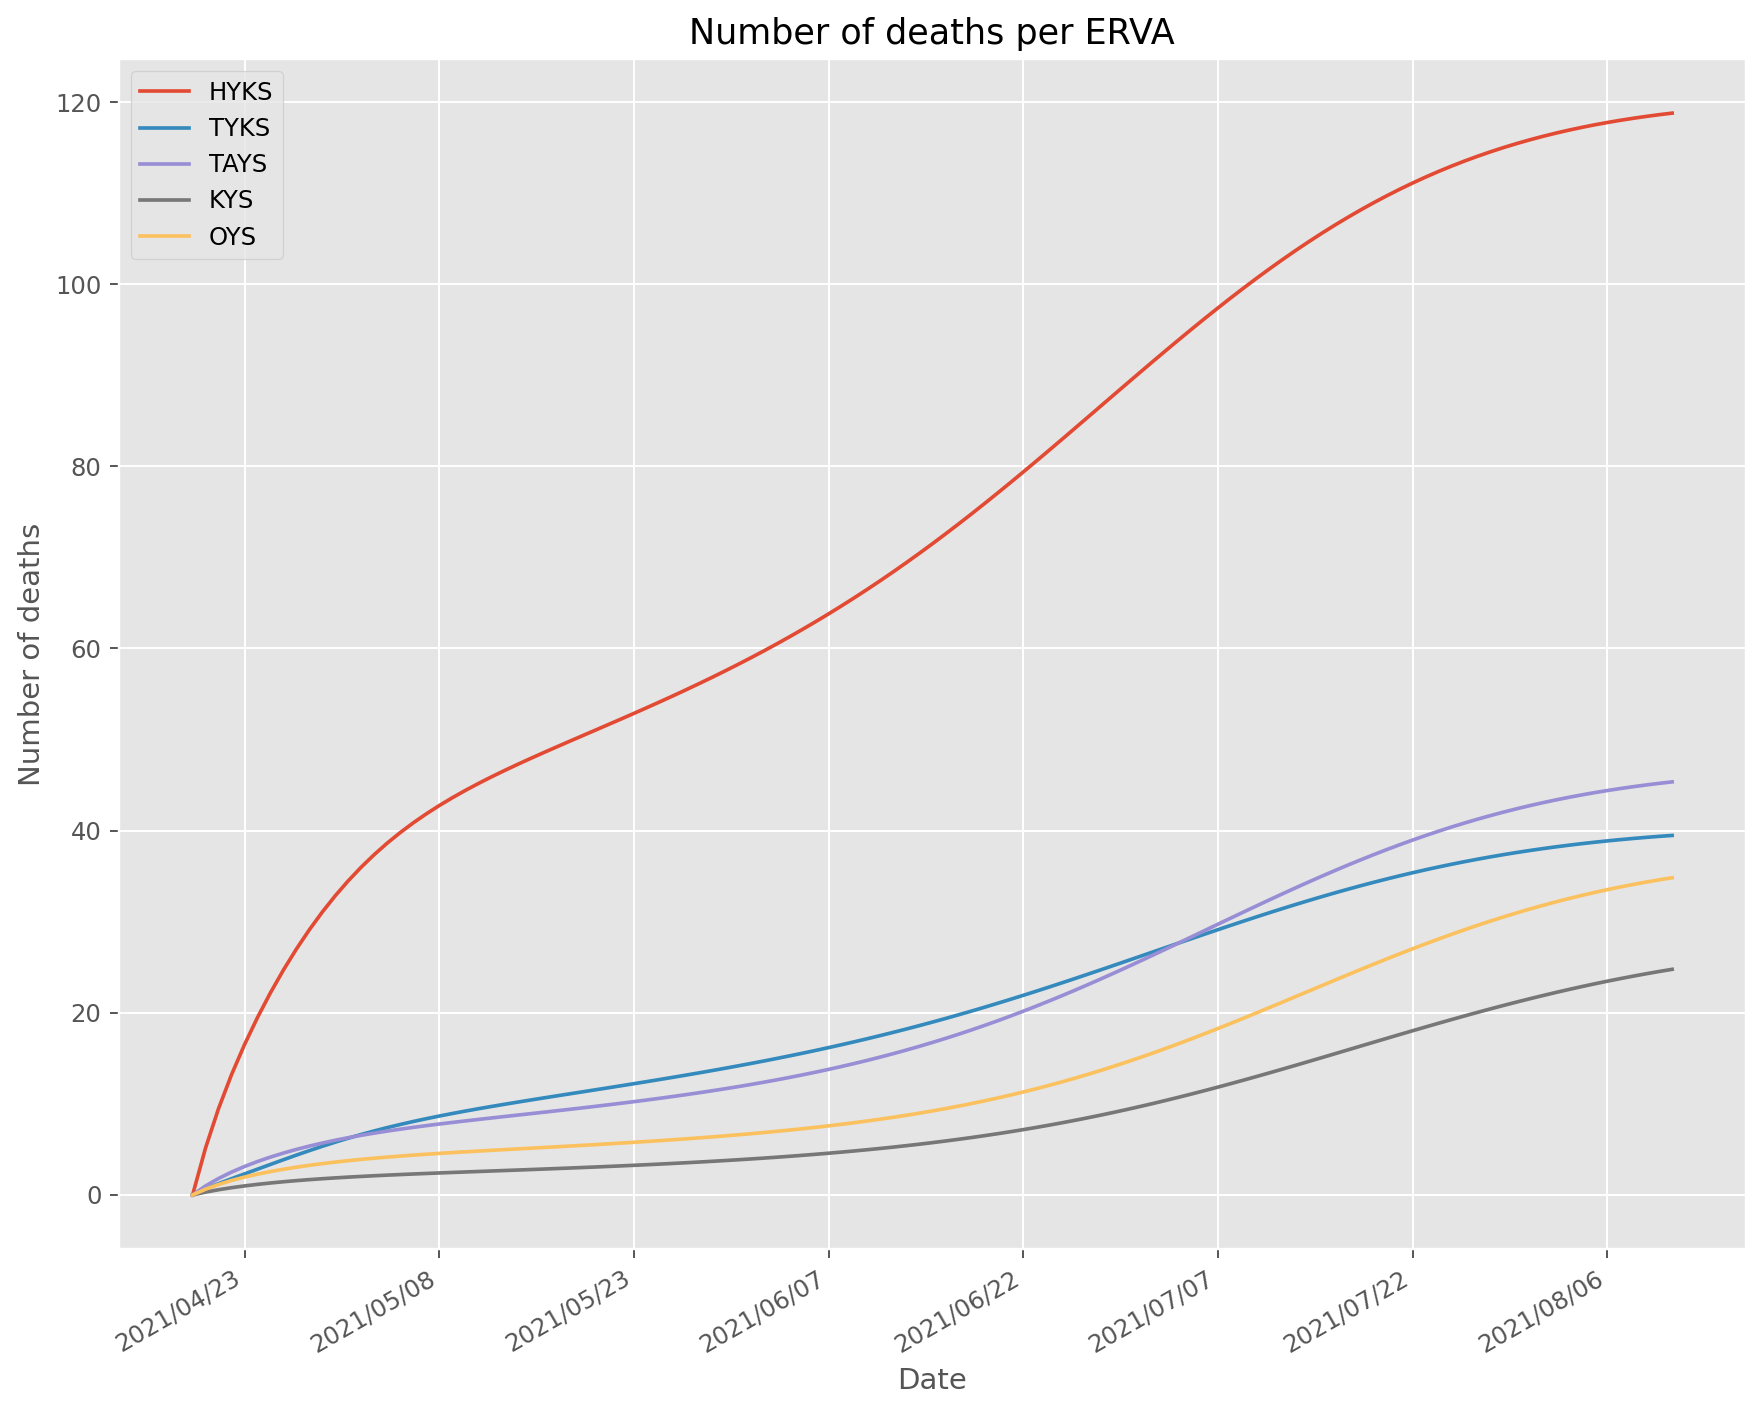

In [5]:
fig, ax = plt.subplots(figsize=(12, 10))
fig.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
fig.gca().xaxis.set_major_locator(mdates.DayLocator(interval=plot_interval))

ax = plot_ervas(ax=ax, D_g=D_g_plot, t0=t0, T=T, ervas_labels=ervas_labels, plot_subject='deaths')

fig.autofmt_xdate()

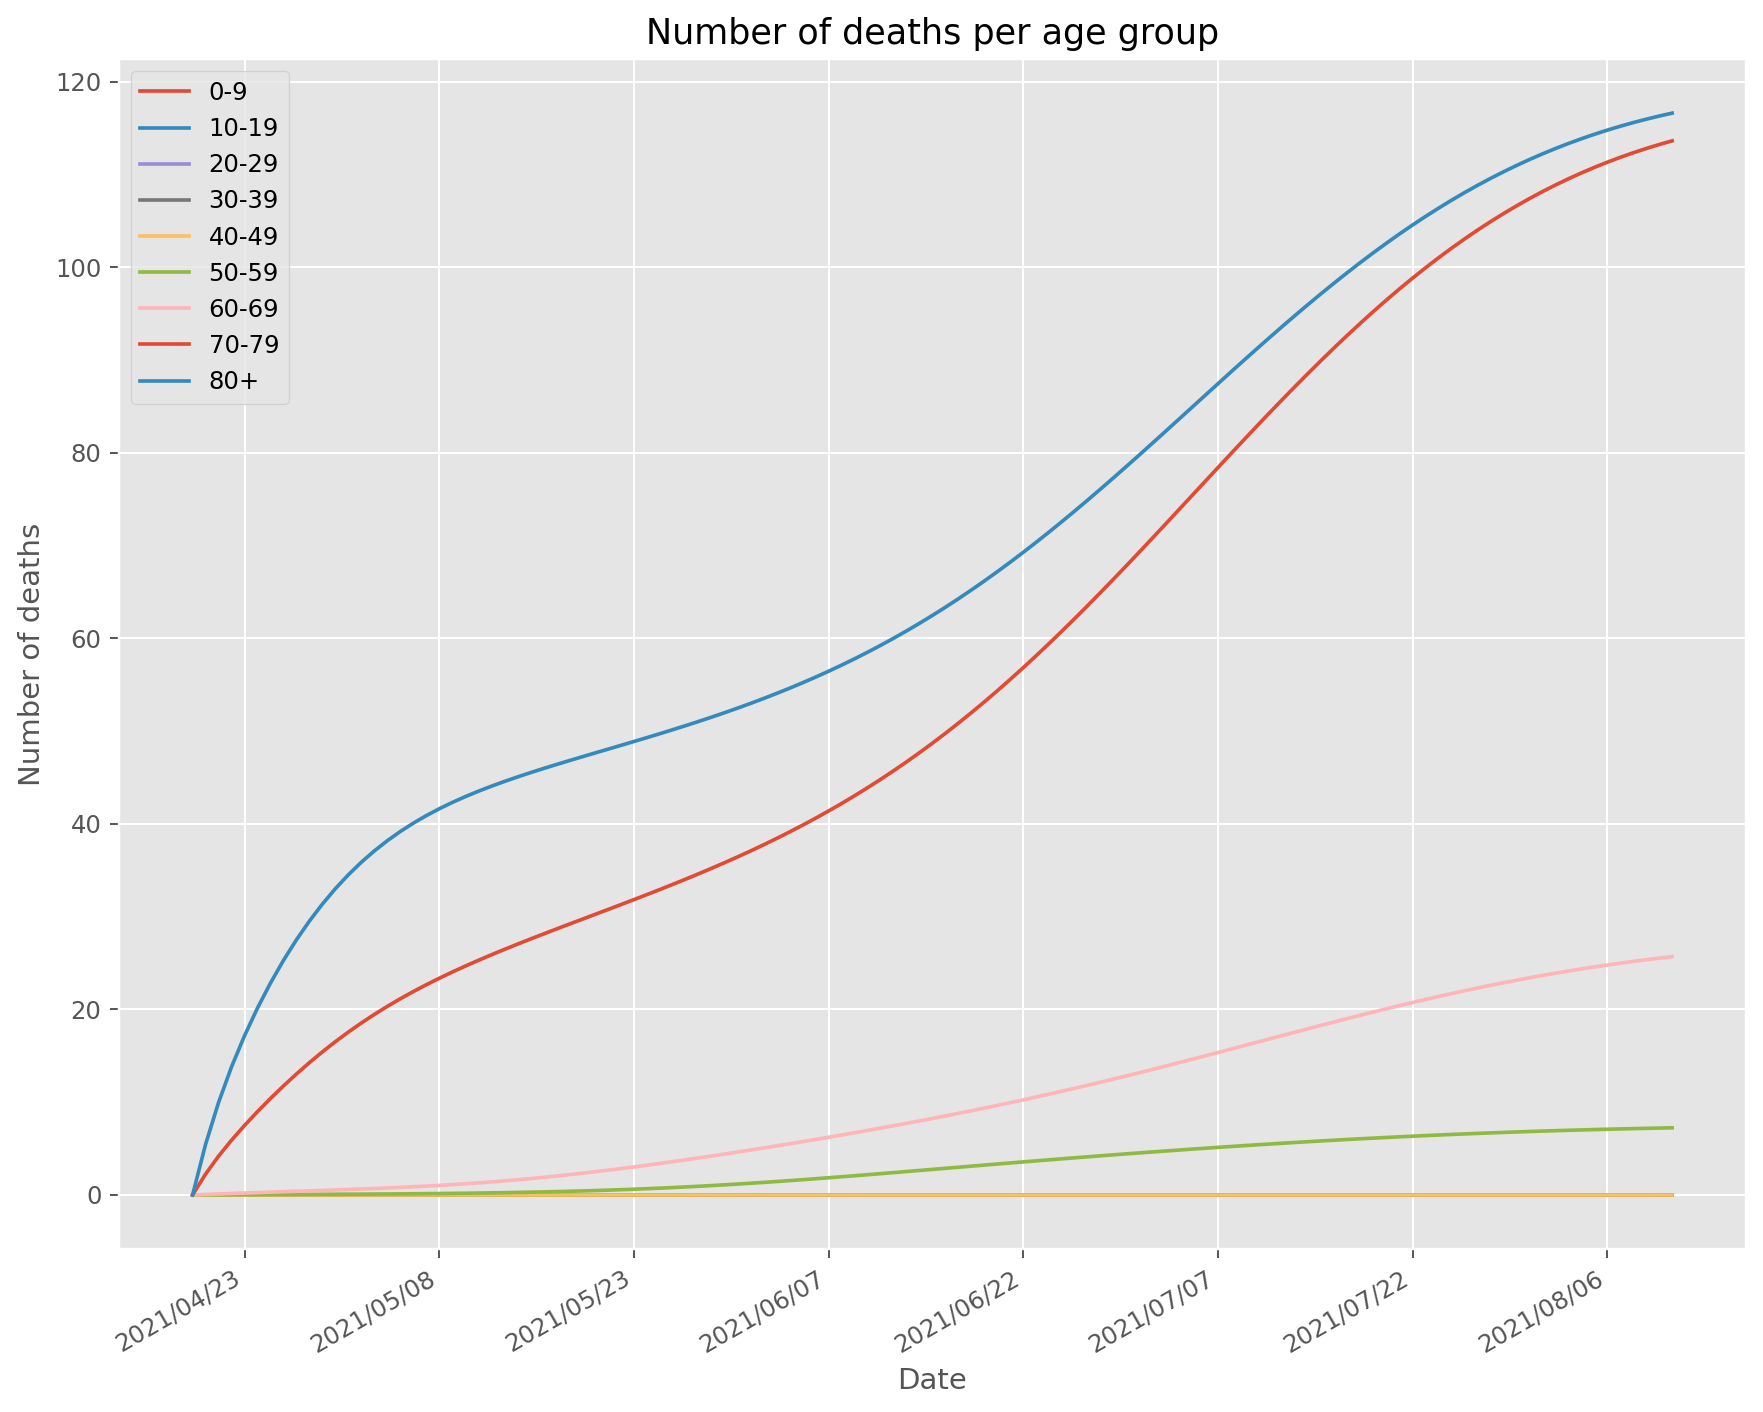

In [6]:
fig, ax = plt.subplots(figsize=(12, 10))
fig.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
fig.gca().xaxis.set_major_locator(mdates.DayLocator(interval=plot_interval))

ax = plot_age_groups(ax=ax, D_g=D_g_plot, t0=t0, T=T, age_labels=age_labels, plot_subject='deaths')

fig.autofmt_xdate()

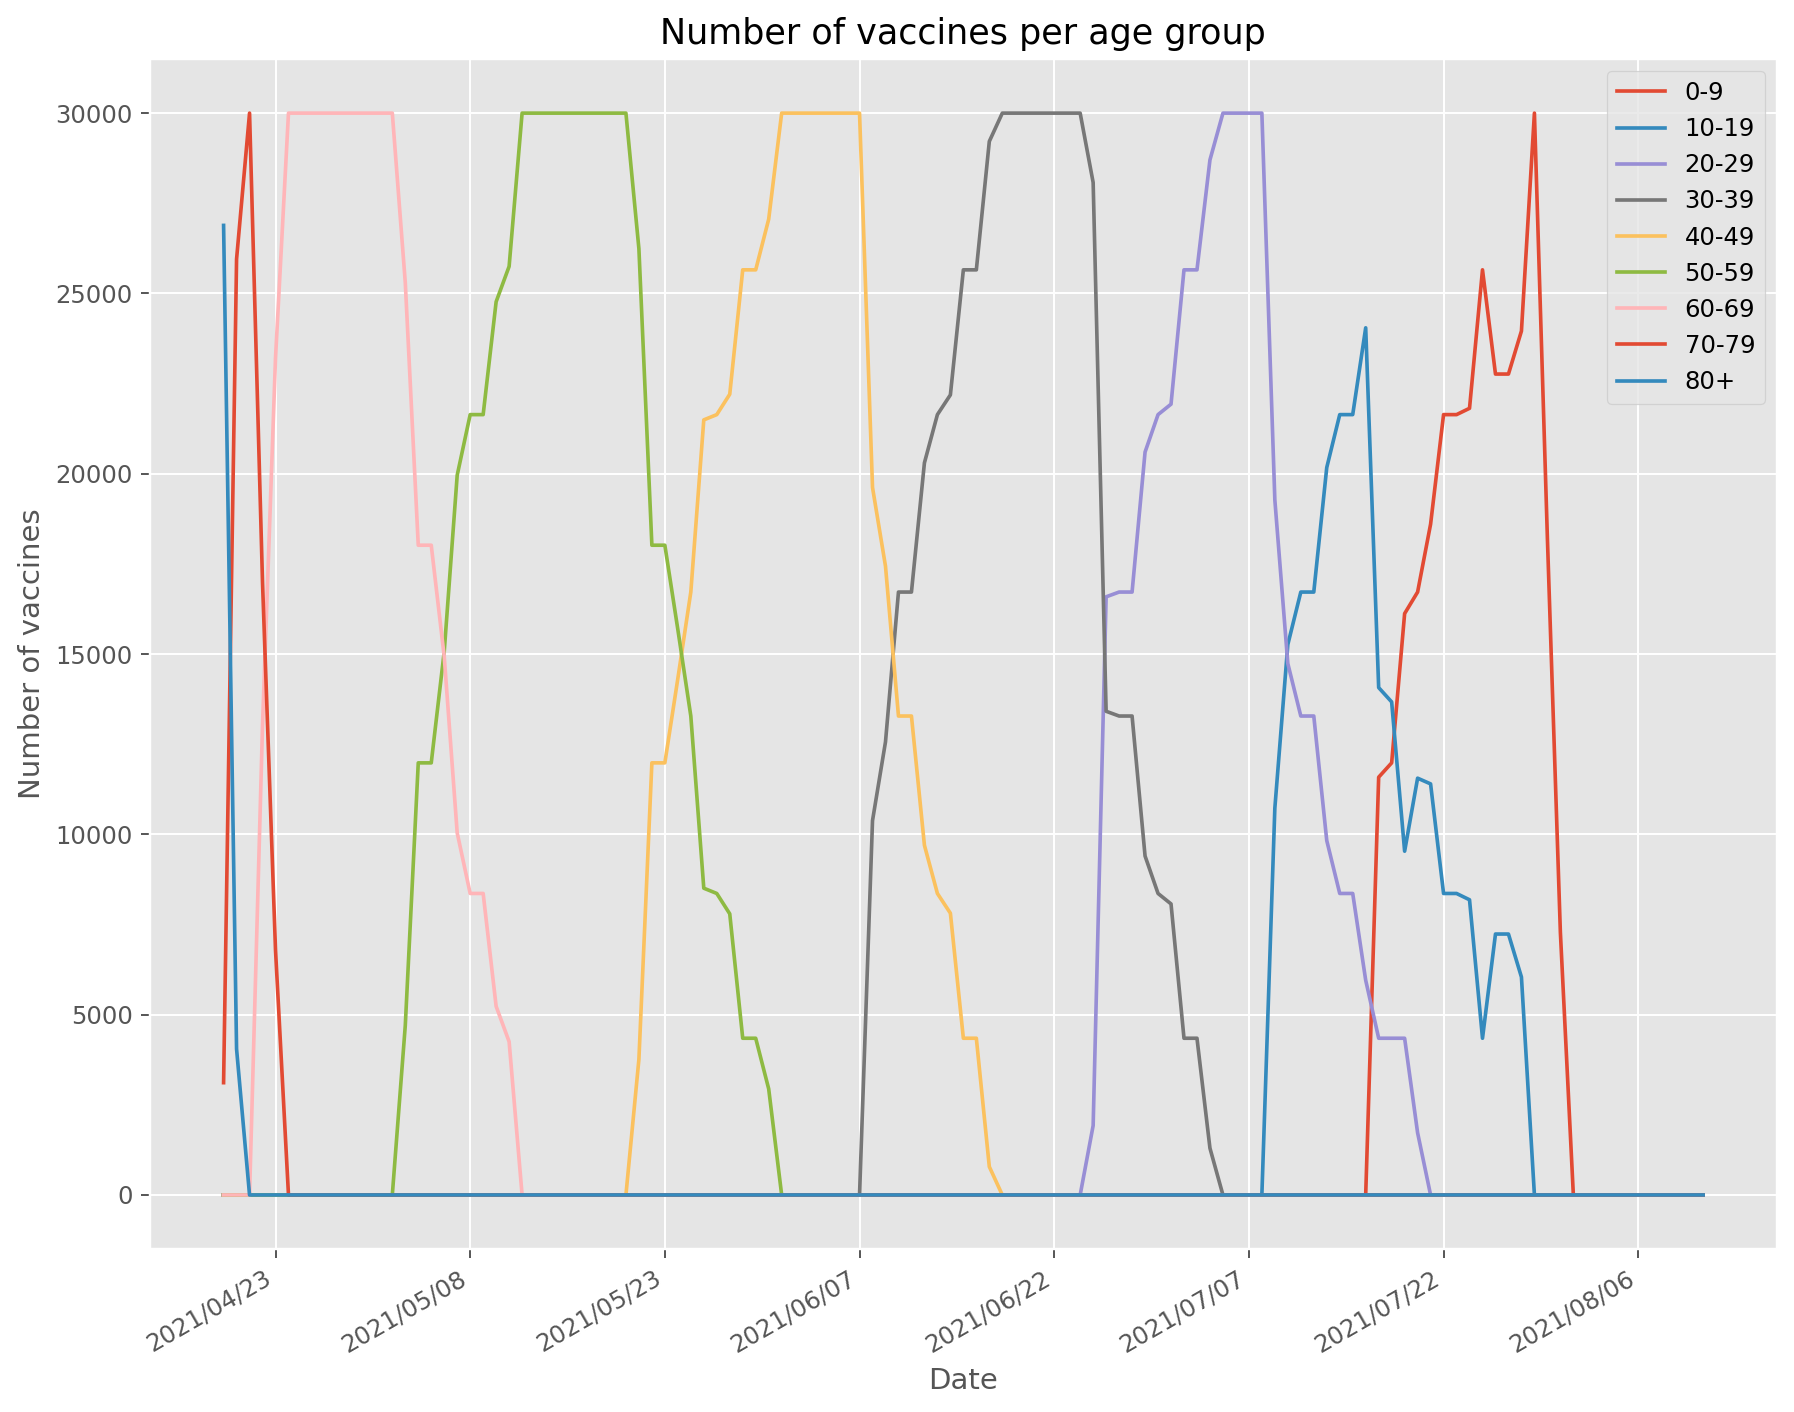

In [7]:
fig, ax = plt.subplots(figsize=(12, 10))
fig.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
fig.gca().xaxis.set_major_locator(mdates.DayLocator(interval=plot_interval))

ax = plot_age_groups(ax=ax, D_g=u_g_plot, t0=t0, T=T, age_labels=age_labels, plot_subject='vaccines')

fig.autofmt_xdate()

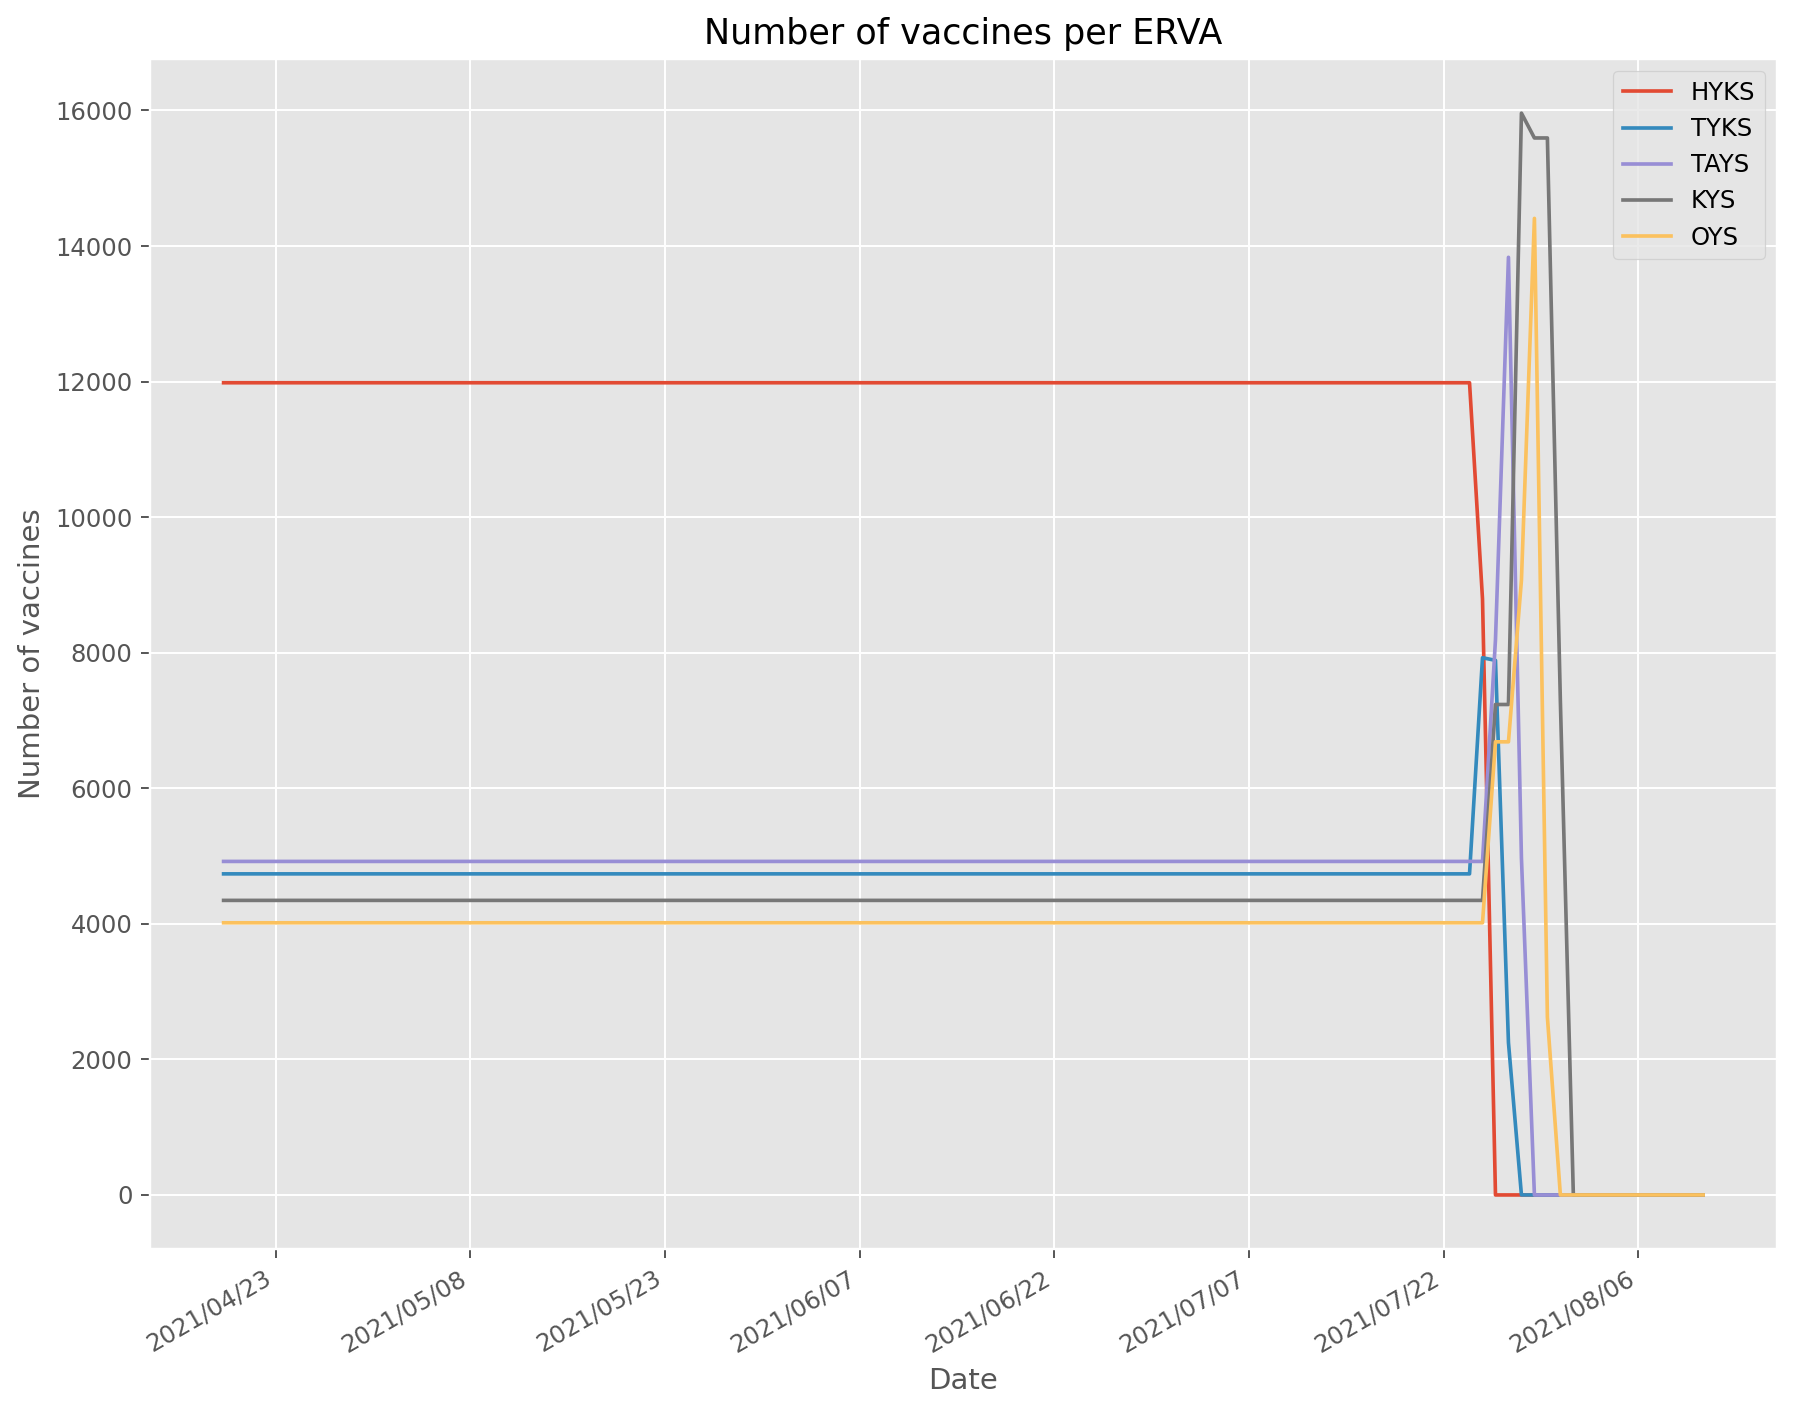

In [8]:
fig, ax = plt.subplots(figsize=(12, 10))
fig.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
fig.gca().xaxis.set_major_locator(mdates.DayLocator(interval=plot_interval))

ax = plot_ervas(ax=ax, D_g=u_g_plot, t0=t0, T=T, ervas_labels=ervas_labels, plot_subject='vaccines')

fig.autofmt_xdate()

In [9]:
policy = 'thl'

_, _, _, _, _, D_g_thl, u_g_thl = forward_integration(u, mob_av, beta, beta_gh, T, pop_erva_hat, age_er, t0, policy)

age_er_prop = age_er.T
age_er_prop = age_er_prop[:, :, np.newaxis]
D_g_thl_plot = D_g_thl*age_er_prop
u_g_thl_plot = u_g_thl*age_er_prop

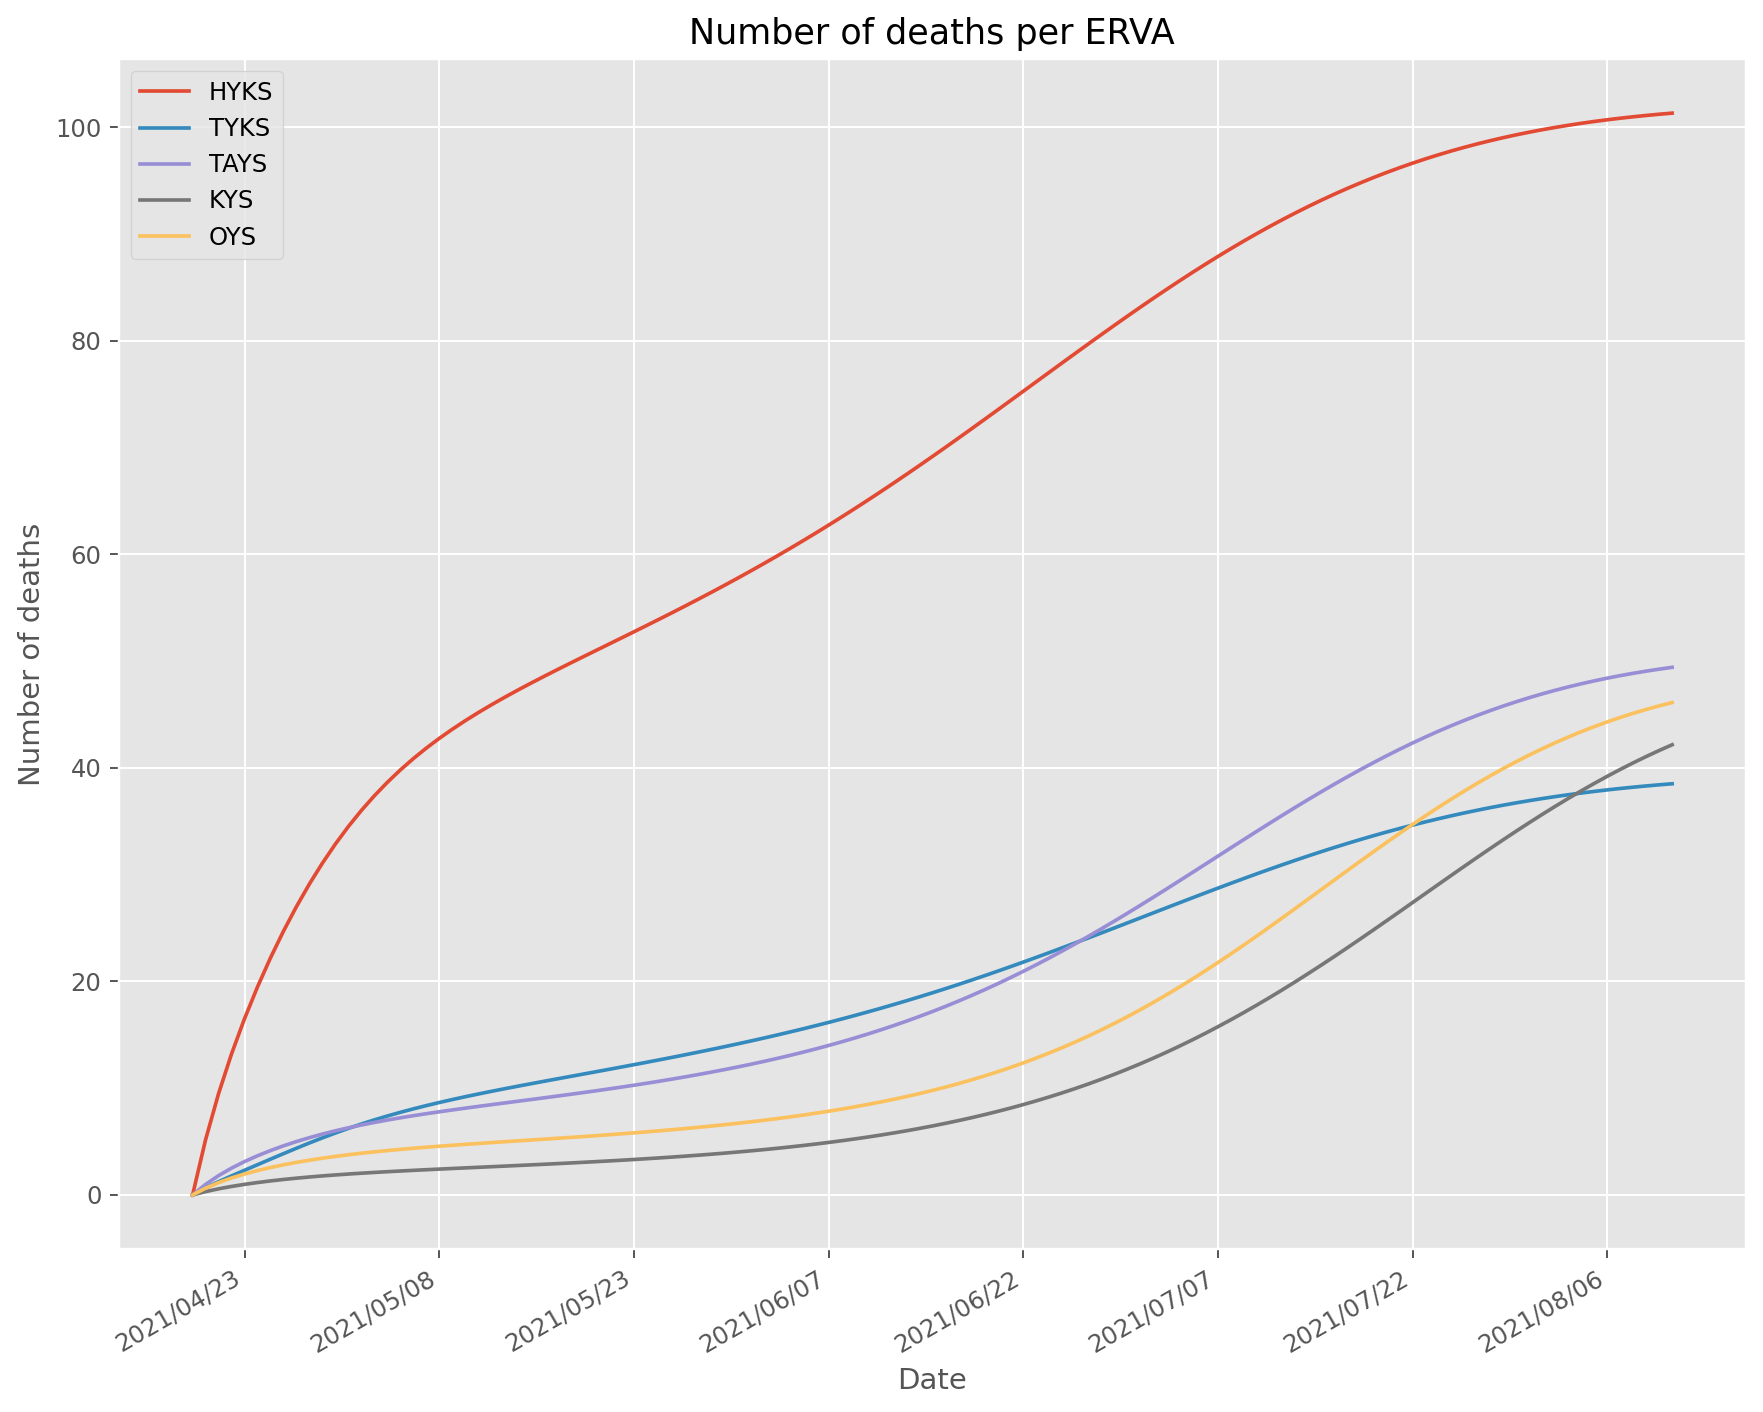

In [10]:
fig, ax = plt.subplots(figsize=(12, 10))
fig.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
fig.gca().xaxis.set_major_locator(mdates.DayLocator(interval=plot_interval))

ax = plot_ervas(ax=ax, D_g=D_g_thl_plot, t0=t0, T=T, ervas_labels=ervas_labels, plot_subject='deaths')

fig.autofmt_xdate()

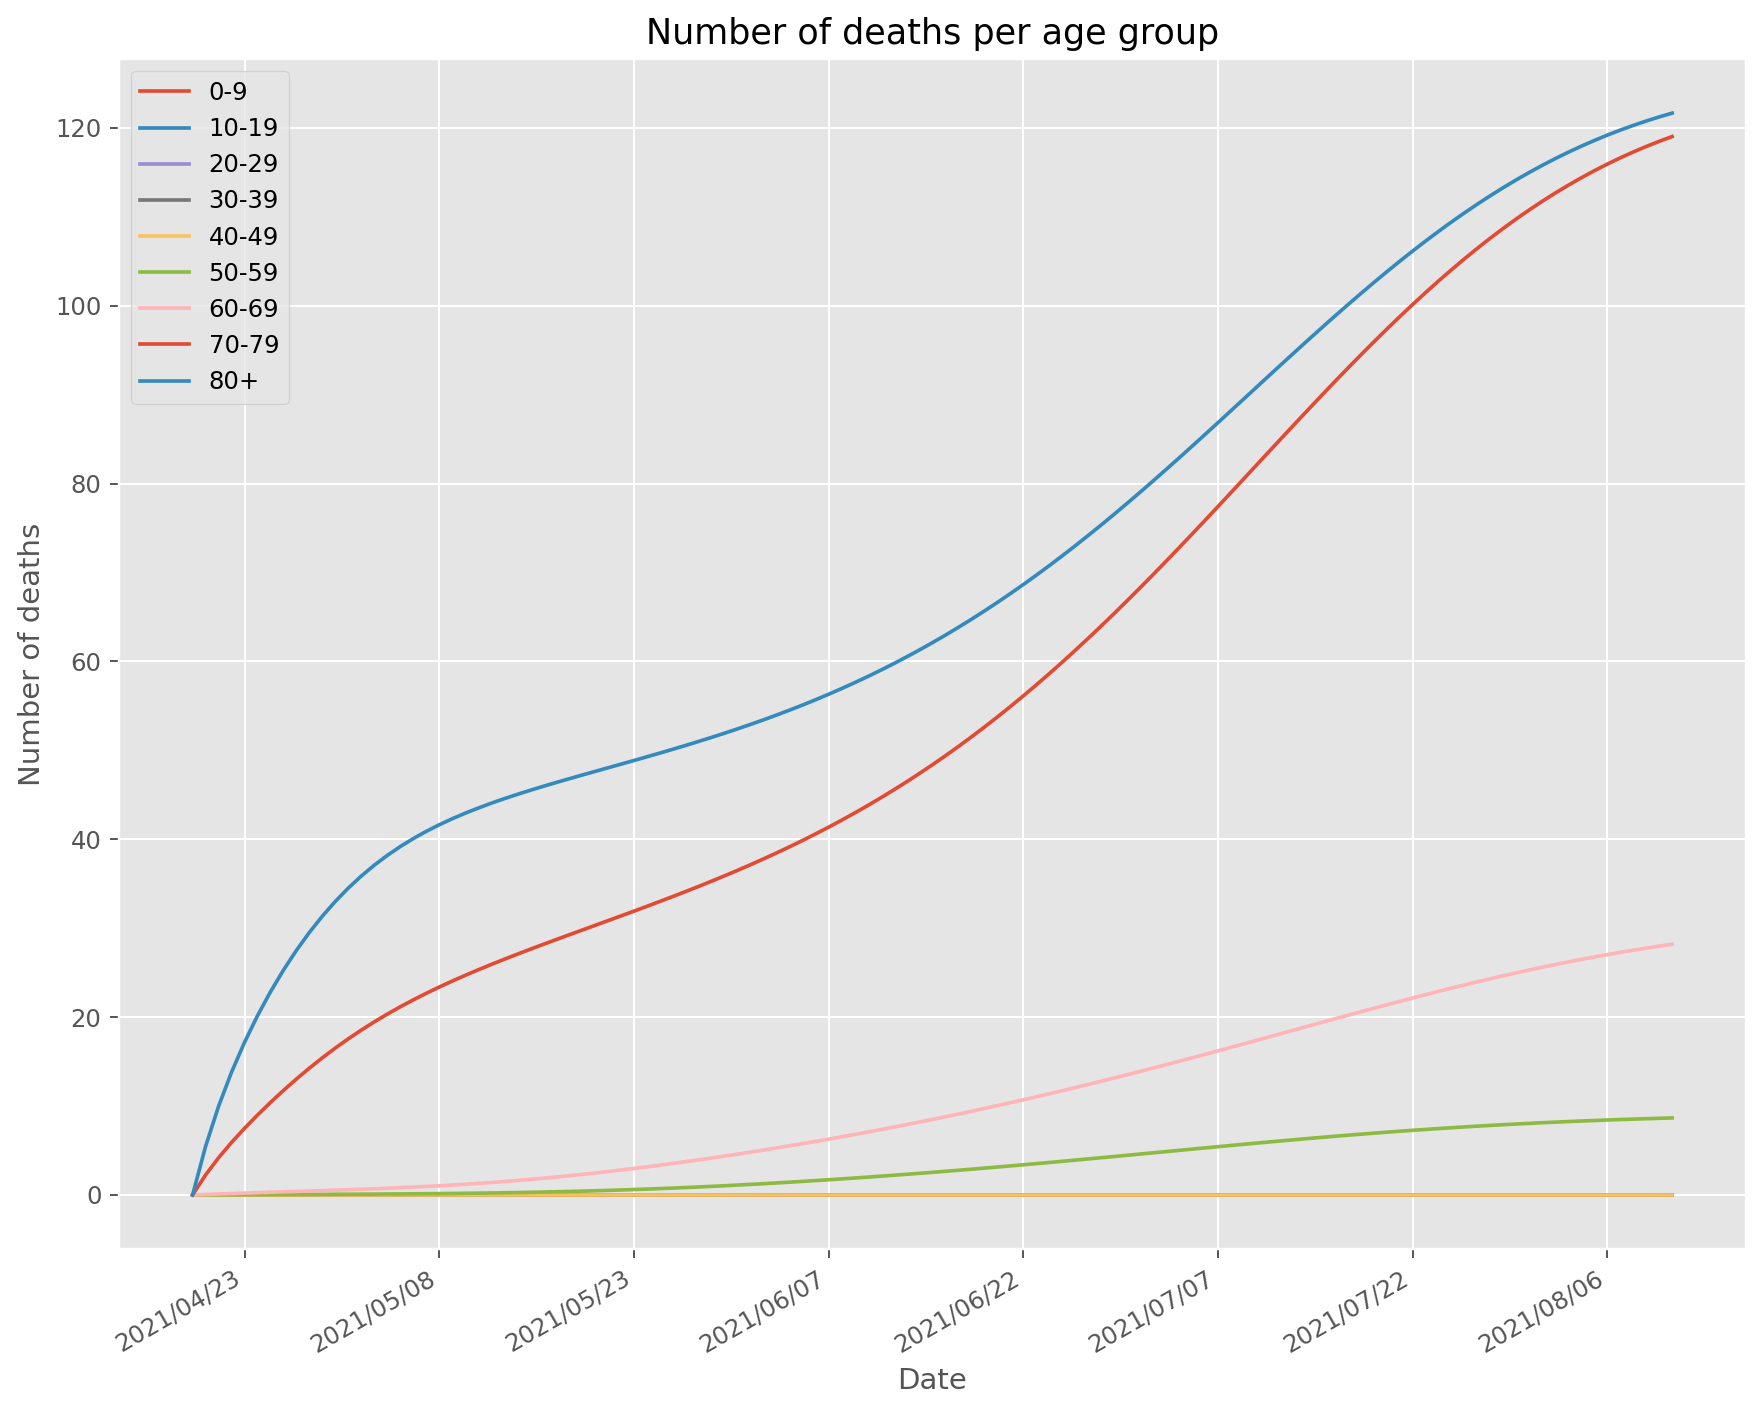

In [11]:
fig, ax = plt.subplots(figsize=(12, 10))
fig.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
fig.gca().xaxis.set_major_locator(mdates.DayLocator(interval=plot_interval))

ax = plot_age_groups(ax=ax, D_g=D_g_thl_plot, t0=t0, T=T, age_labels=age_labels, plot_subject='deaths')

fig.autofmt_xdate()

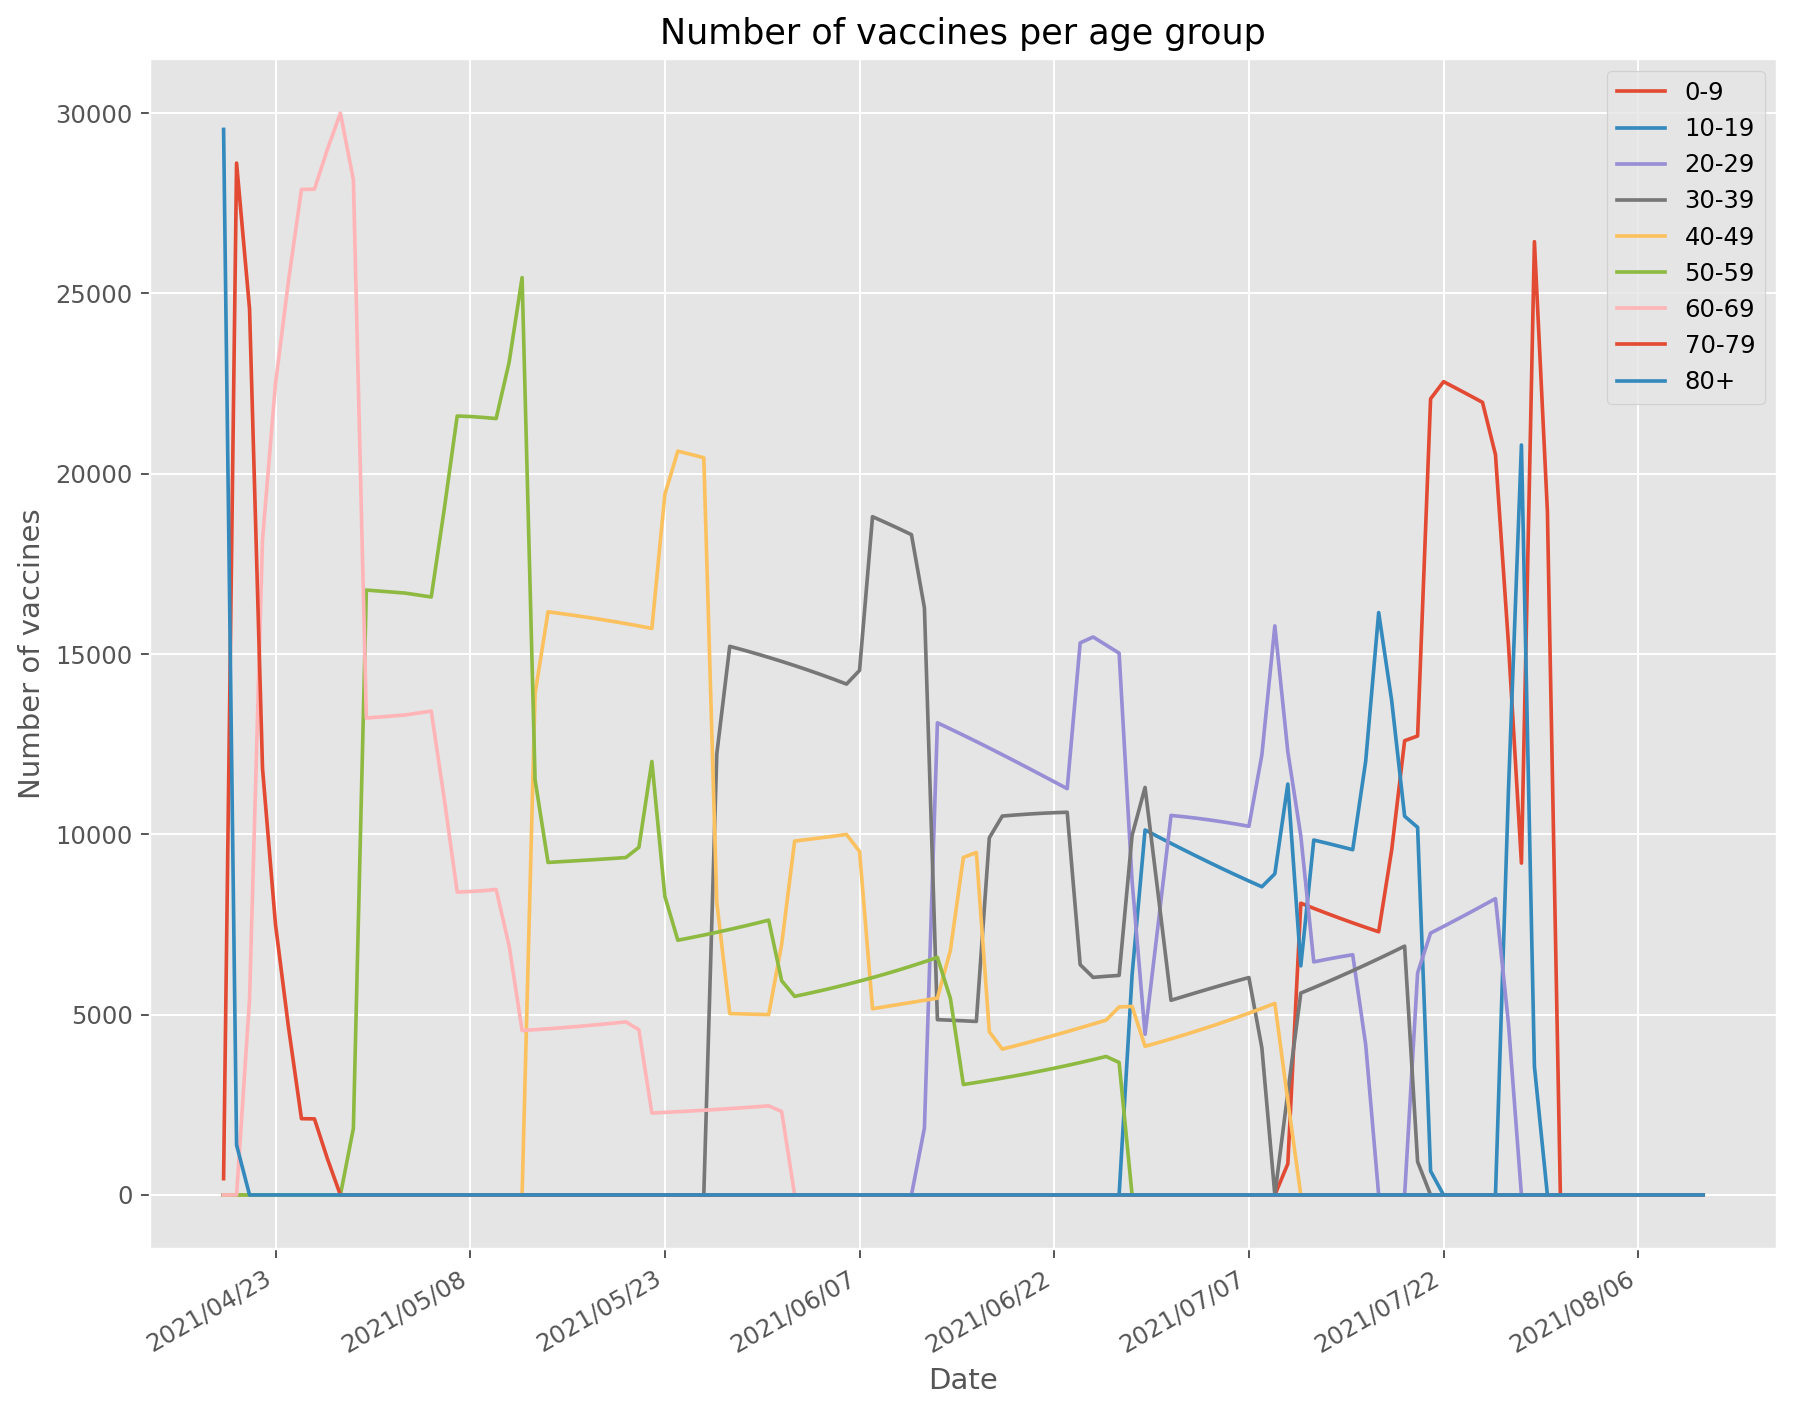

In [12]:
fig, ax = plt.subplots(figsize=(12, 10))
fig.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
fig.gca().xaxis.set_major_locator(mdates.DayLocator(interval=plot_interval))

ax = plot_age_groups(ax=ax, D_g=u_g_thl_plot, t0=t0, T=T, age_labels=age_labels, plot_subject='vaccines')

fig.autofmt_xdate()

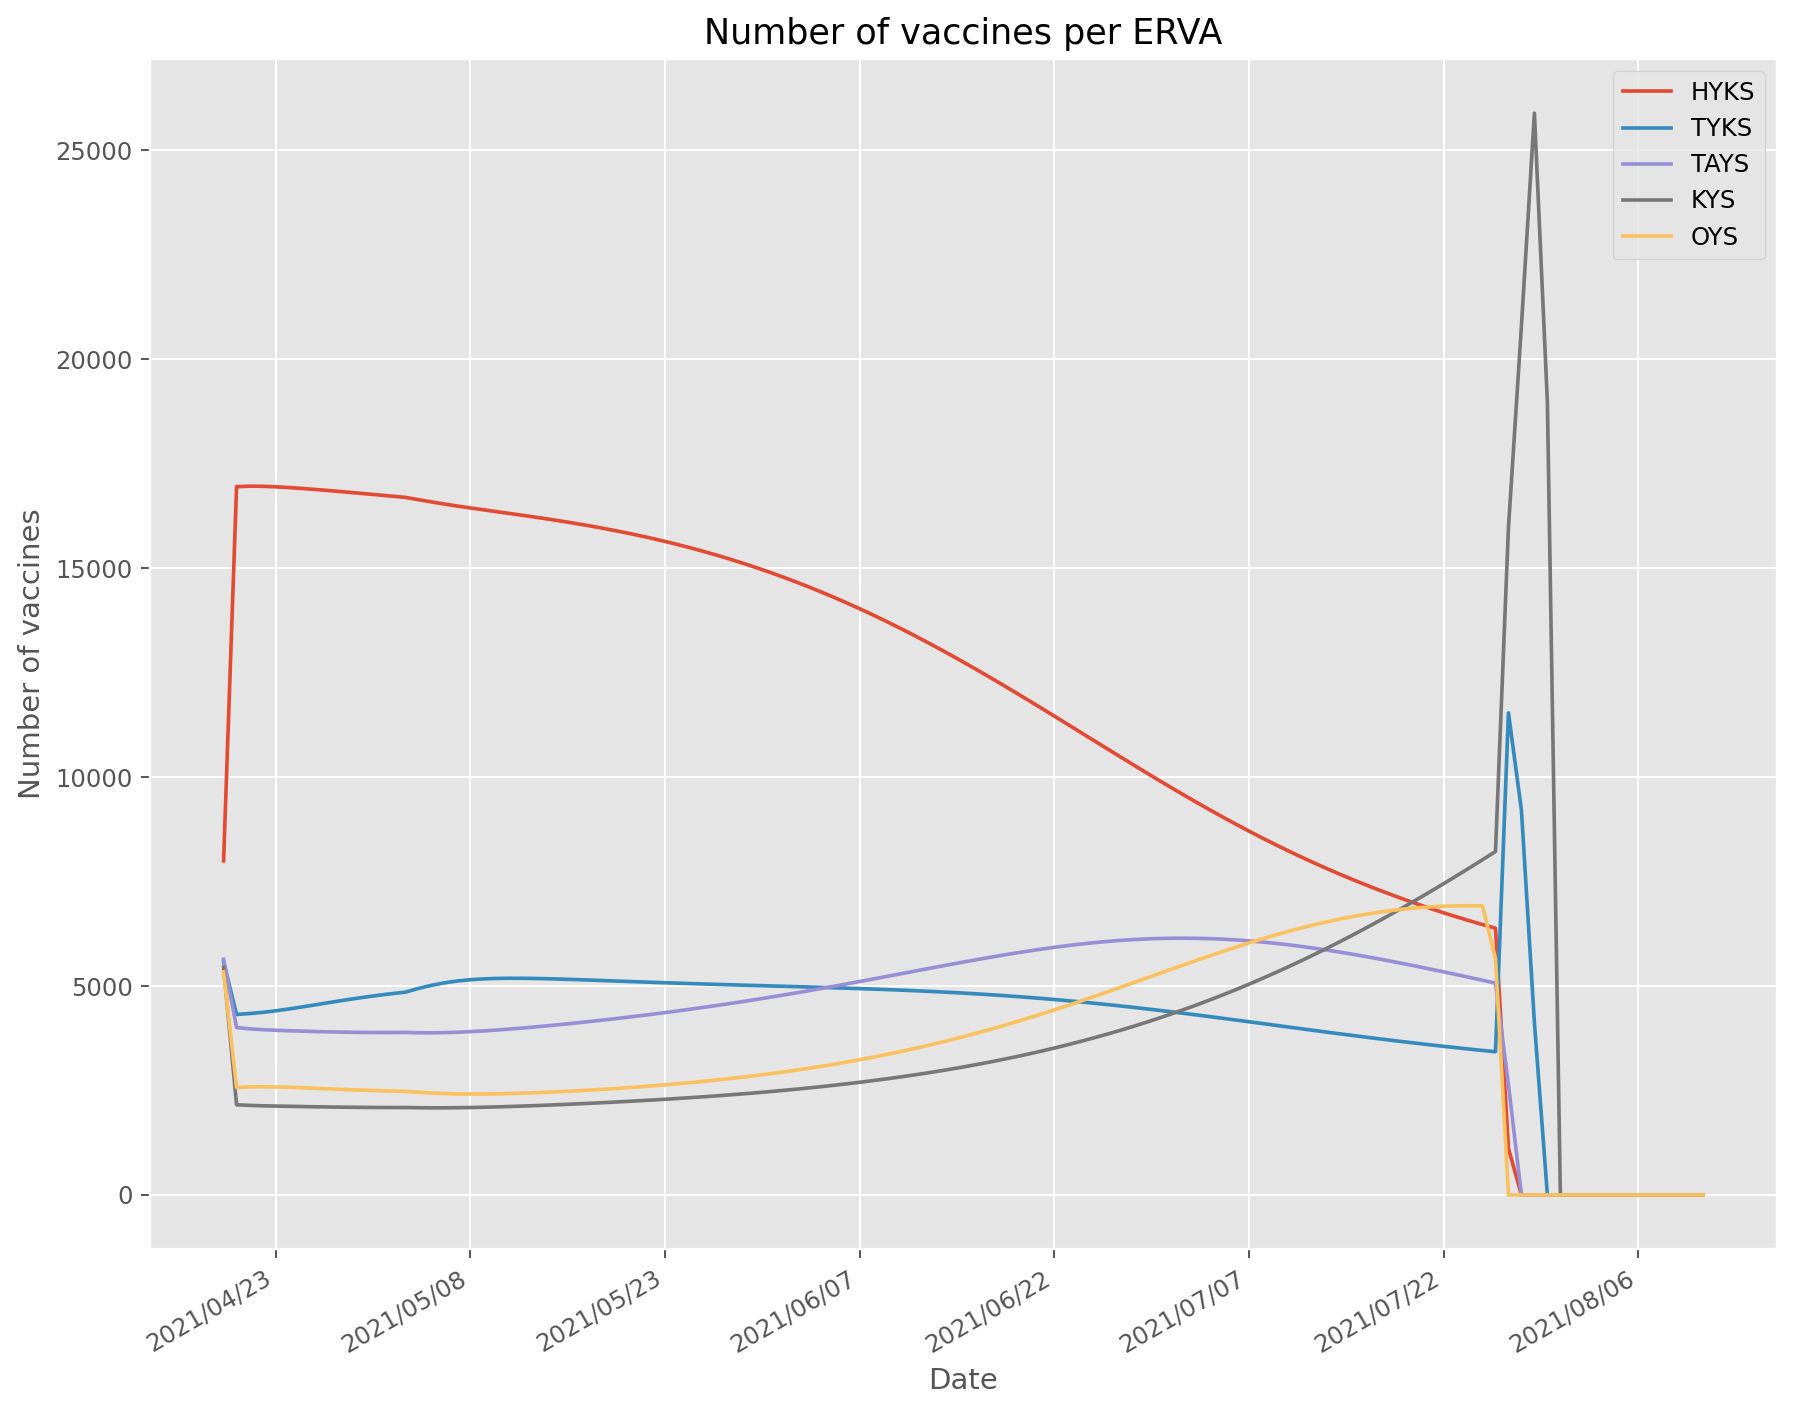

In [13]:
fig, ax = plt.subplots(figsize=(12, 10))
fig.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
fig.gca().xaxis.set_major_locator(mdates.DayLocator(interval=plot_interval))

ax = plot_ervas(ax=ax, D_g=u_g_thl_plot, t0=t0, T=T, ervas_labels=ervas_labels, plot_subject='vaccines')

fig.autofmt_xdate()

In [14]:
policy = 'no_vacc'

_, _, _, _, _, D_g_no, u_g_no = forward_integration(u, mob_av, beta, beta_gh, T, pop_erva_hat, age_er, t0, policy)

age_er_prop = age_er.T
age_er_prop = age_er_prop[:, :, np.newaxis]
D_g_no_plot = D_g_no*age_er_prop
u_g_no_plot = u_g_no*age_er_prop

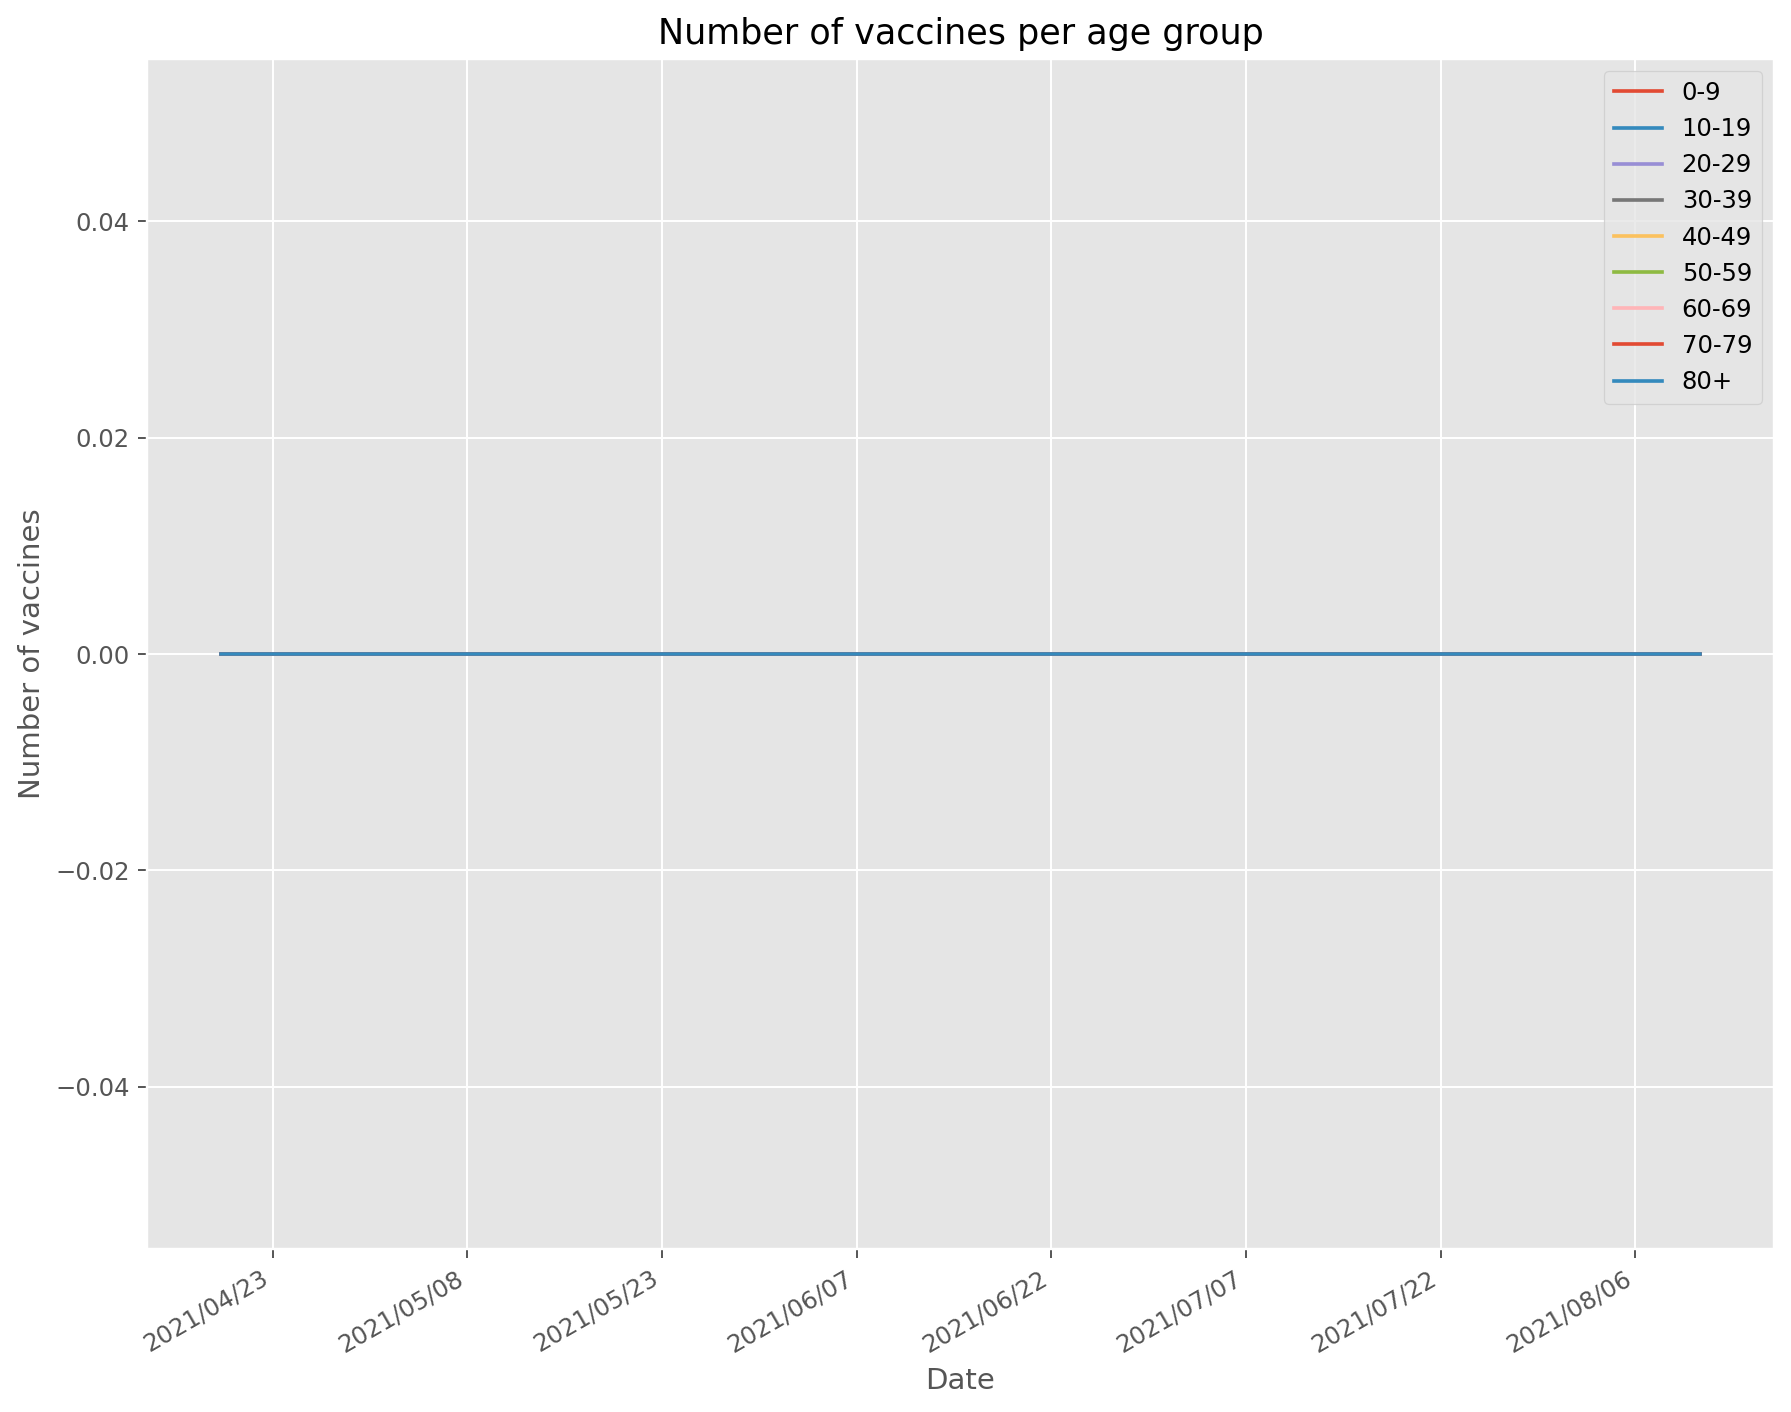

In [15]:
fig, ax = plt.subplots(figsize=(12, 10))
fig.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
fig.gca().xaxis.set_major_locator(mdates.DayLocator(interval=plot_interval))

ax = plot_age_groups(ax=ax, D_g=u_g_no_plot, t0=t0, T=T, age_labels=age_labels, plot_subject='vaccines')

fig.autofmt_xdate()

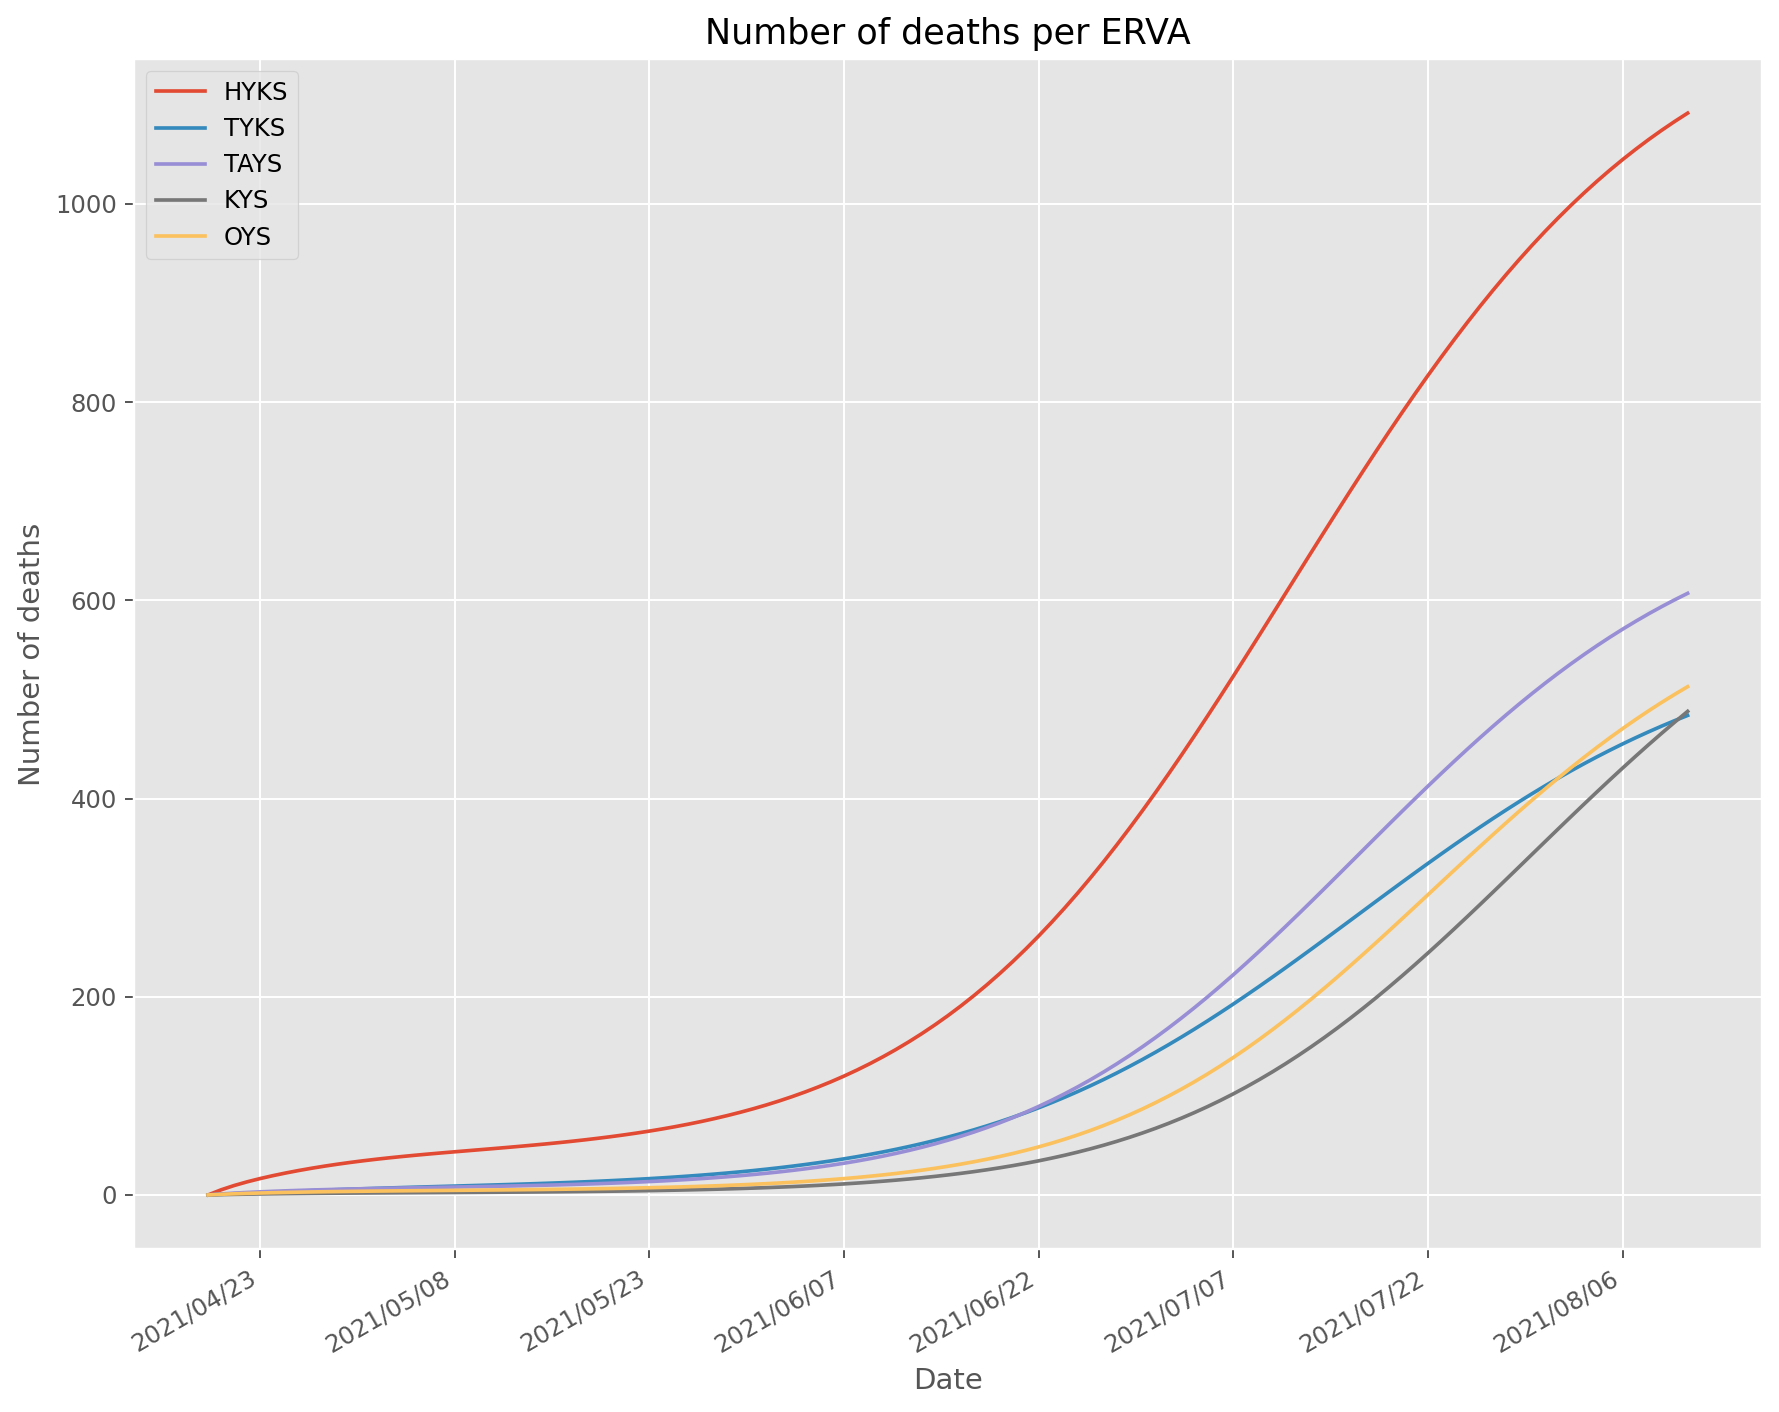

In [16]:
fig, ax = plt.subplots(figsize=(12, 10))
fig.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
fig.gca().xaxis.set_major_locator(mdates.DayLocator(interval=plot_interval))

ax = plot_ervas(ax=ax, D_g=D_g_no_plot, t0=t0, T=T, ervas_labels=ervas_labels, plot_subject='deaths')

fig.autofmt_xdate()

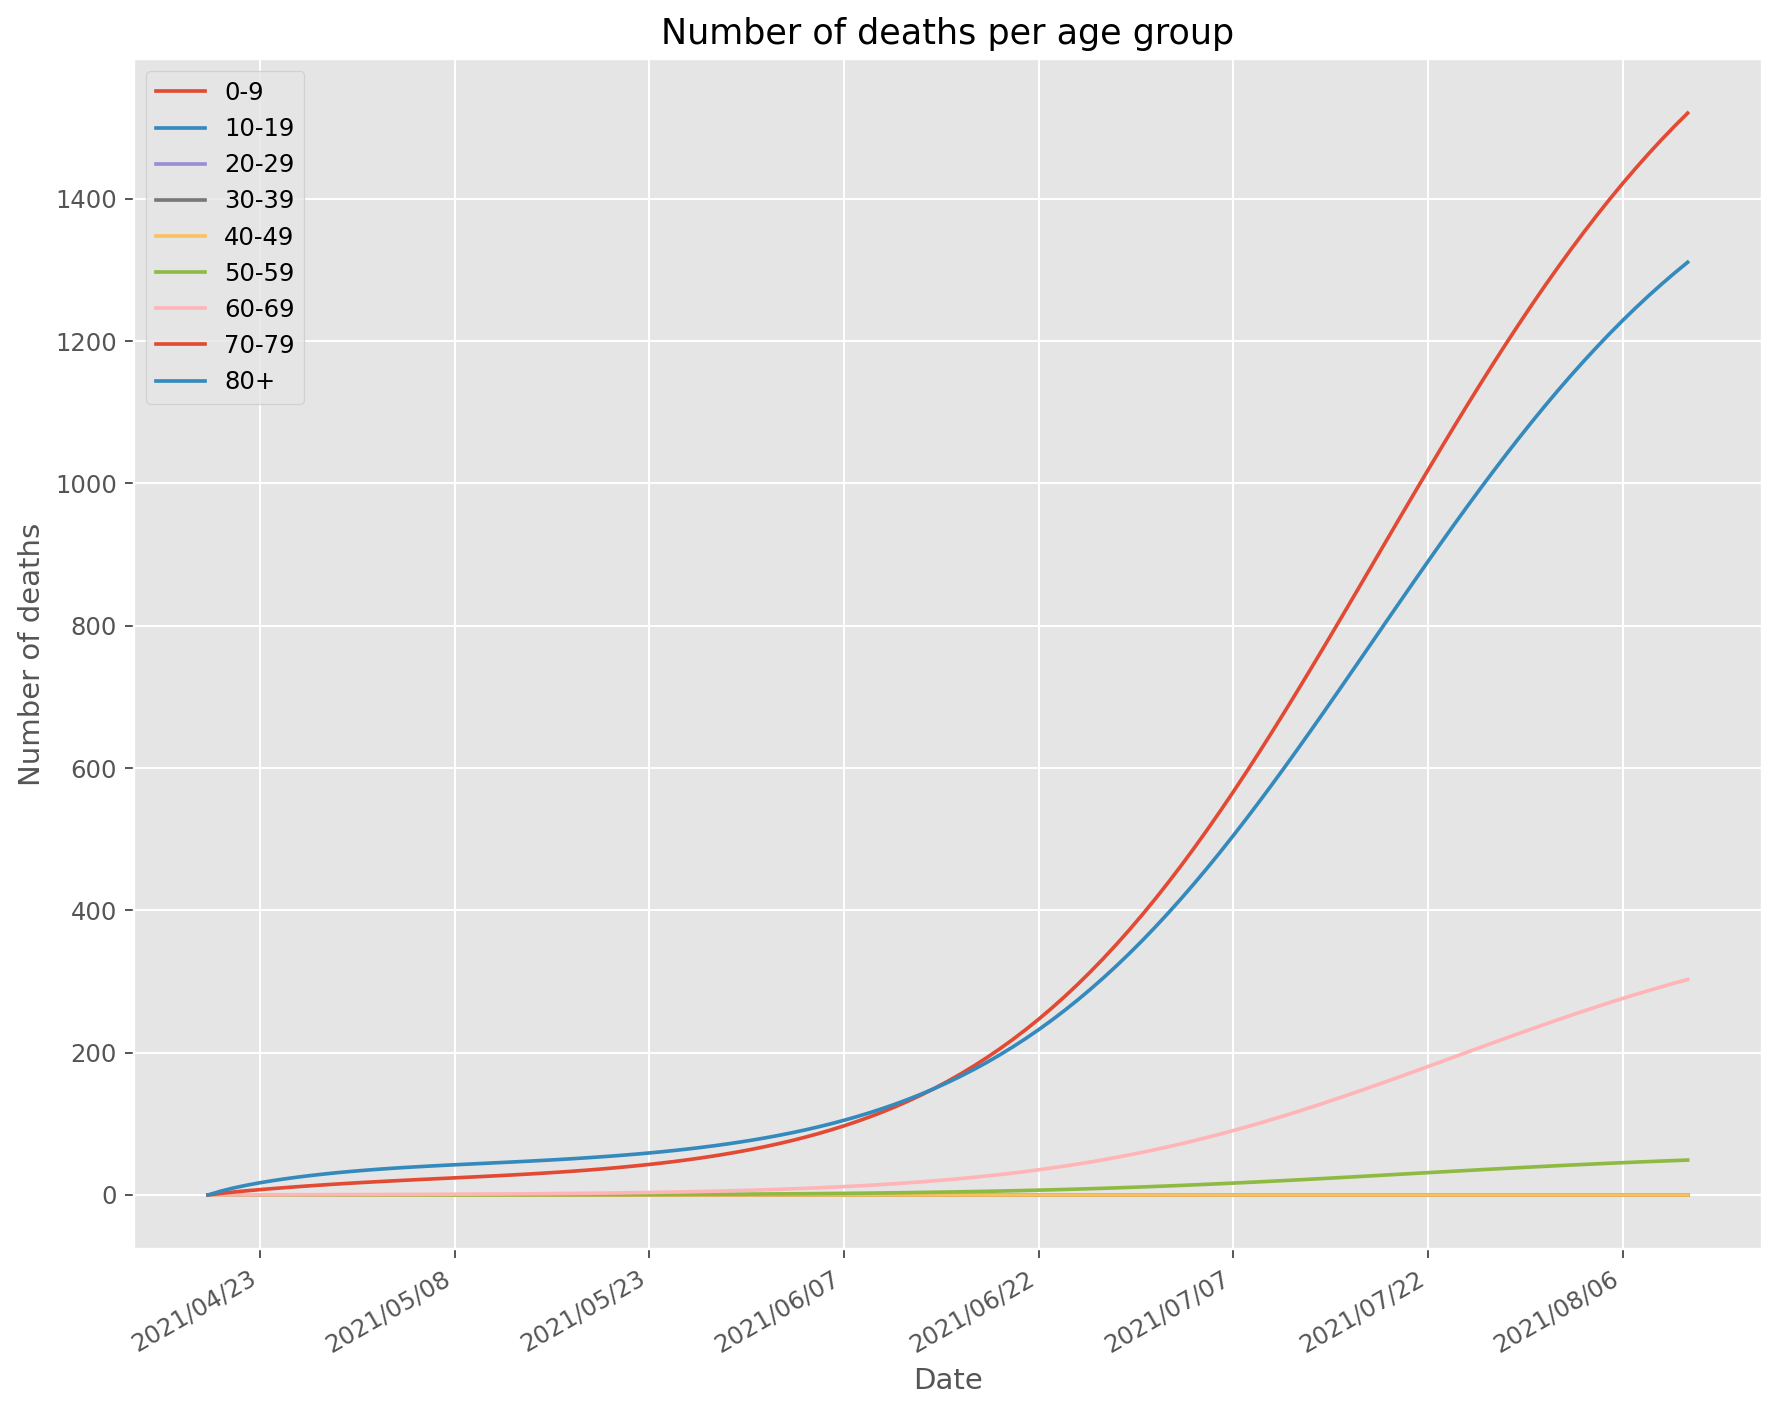

In [17]:
fig, ax = plt.subplots(figsize=(12, 10))
fig.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
fig.gca().xaxis.set_major_locator(mdates.DayLocator(interval=plot_interval))

ax = plot_age_groups(ax=ax, D_g=D_g_no_plot, t0=t0, T=T, age_labels=age_labels, plot_subject='deaths')

fig.autofmt_xdate()

In [18]:
def plot_compare_strategies(ax, D_g, D_g_thl, D_g_no_plot, t0, T):
    begin = datetime.datetime.strptime(t0, '%Y-%m-%d')
    
    num_ages, num_ervas, days = D_g.shape
    assert num_ages == len(age_labels)
    
    x = [begin + datetime.timedelta(days=day) for day in range(T)]
    
    deaths = D_g.sum(axis=1)
    deaths = deaths.sum(axis=0)
    
    deaths_thl = D_g_thl.sum(axis=1)
    deaths_thl = deaths_thl.sum(axis=0)
    
    deaths_no = D_g_no_plot.sum(axis=1)
    deaths_no = deaths_no.sum(axis=0)
    
    assert deaths.shape == deaths_thl.shape
    assert deaths.shape == deaths_no.shape
    assert deaths.shape[0] == T
    
    ax.plot(x, deaths, label='Number of vaccines proportional to population')
    ax.plot(x, deaths_thl, label='THL strategy. Weighted sum')
    ax.plot(x, deaths_no, label='No vaccination.')
    
    
    ax.set_xlabel('Date')
    ax.set_ylabel('Number of deaths')
    ax.set_title('Comparing vaccination strategies')
        
    ax.legend()
    
    return ax

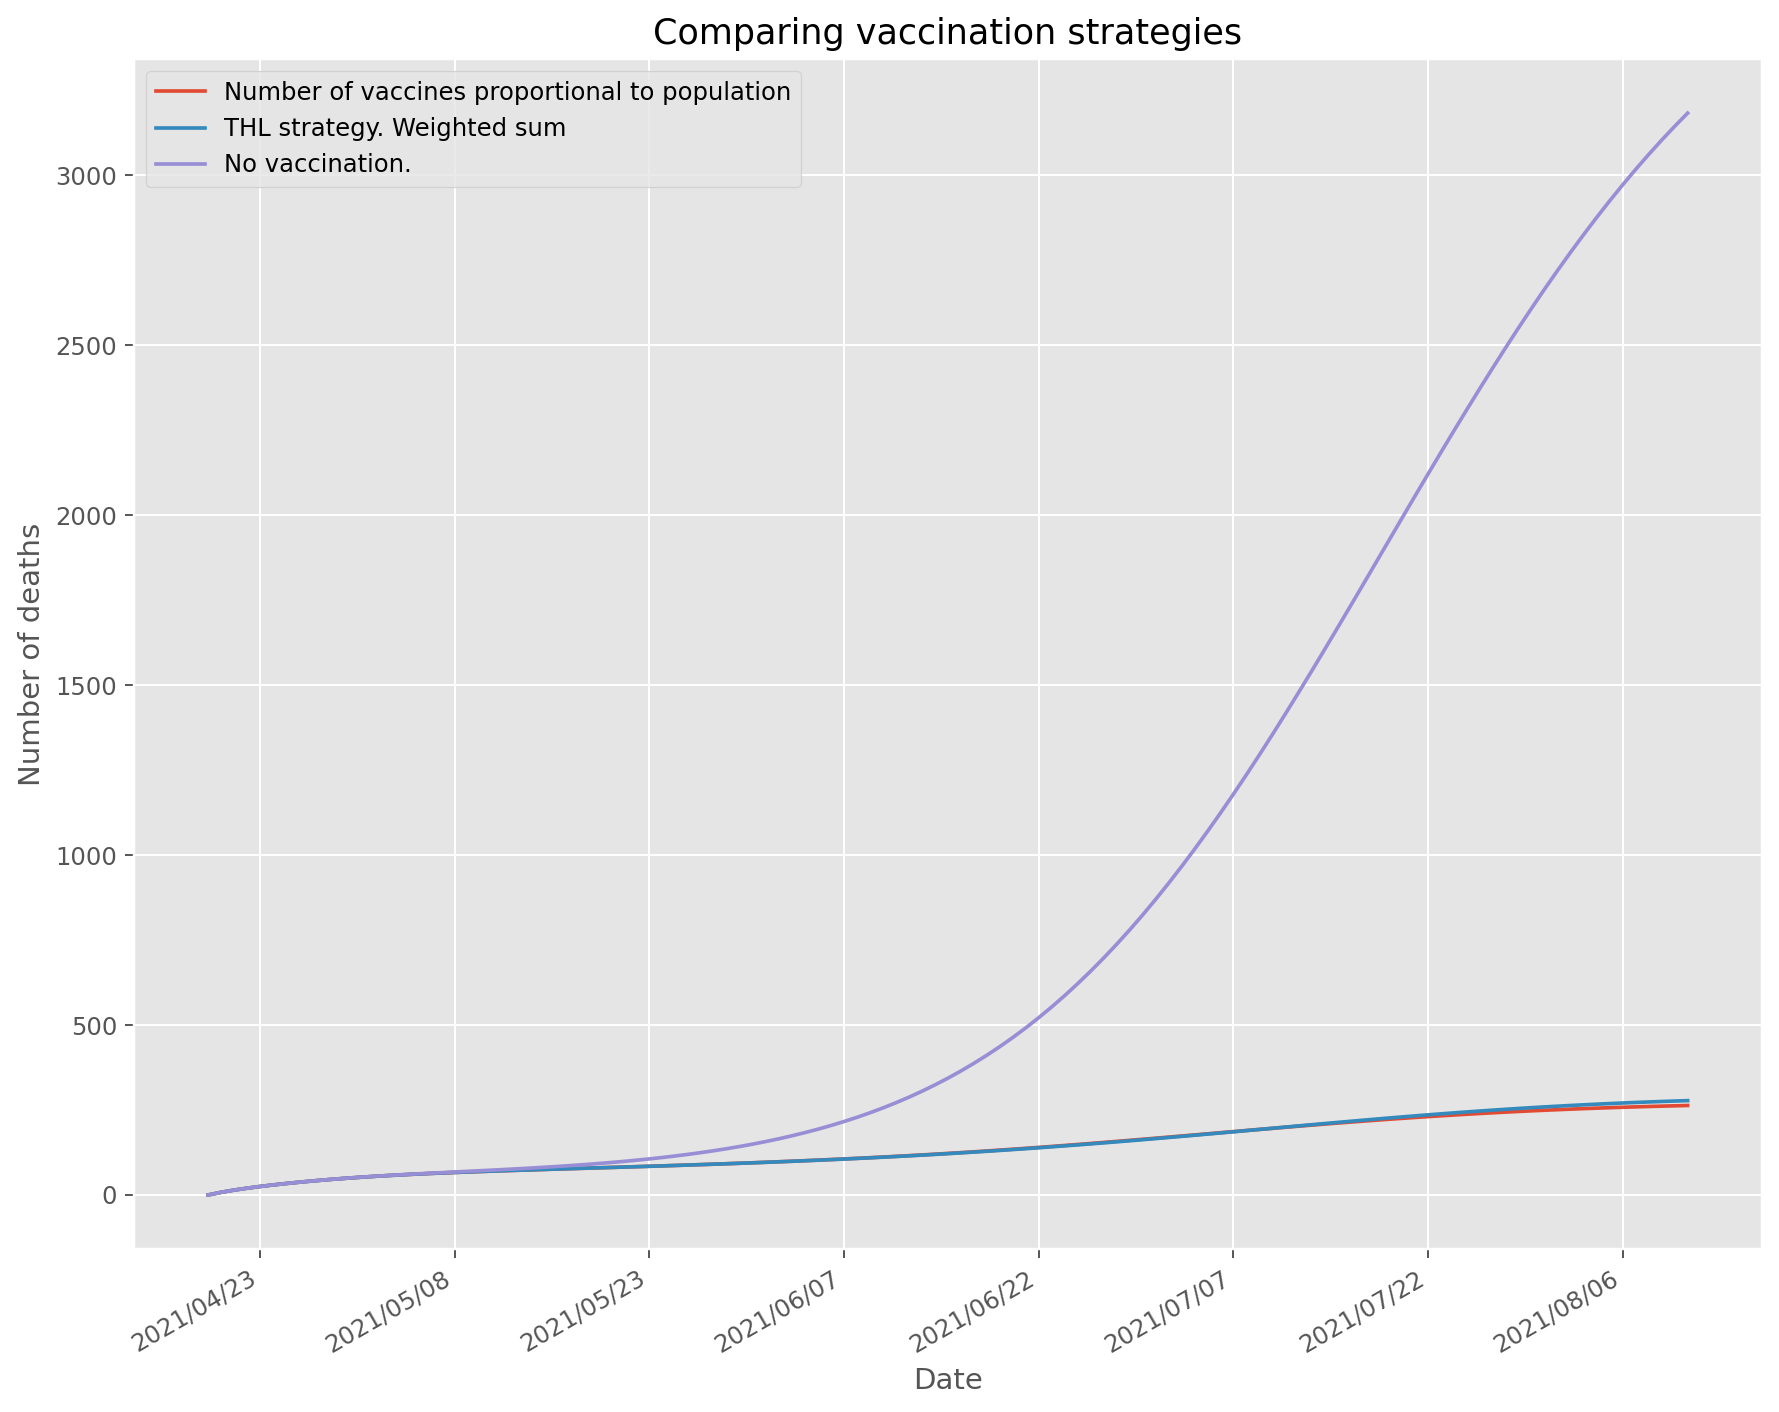

In [19]:
fig, ax = plt.subplots(figsize=(12, 10))
fig.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
fig.gca().xaxis.set_major_locator(mdates.DayLocator(interval=plot_interval))

ax = plot_compare_strategies(ax=ax, D_g=D_g_plot, D_g_thl=D_g_thl_plot, D_g_no_plot=D_g_no_plot, t0=t0, T=T)

fig.autofmt_xdate()

In [20]:
total_thl = np.sum(D_g_thl_plot[:, :, -1])
total_equal = np.sum(D_g_plot[:, :, -1])
total_no = np.sum(D_g_no_plot[:, :, -1])
print('Final total deaths per strategy\n'
      'Relative to population: %f\n'
      'THL strategy: %f\n'
      'No vaccination: %f\n' % (total_equal, total_thl, total_no))

Final total deaths per strategy
Relative to population: 263.202447
THL strategy: 277.543314
No vaccination: 3183.193037

